In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
data=pd.read_csv("breast cancer.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [7]:
data.shape

(569, 33)

In [8]:
data.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Droping unwanted columns
data.drop(columns=['id','Unnamed: 32'],axis=1,inplace=True)

In [11]:
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data.duplicated().sum()

0

In [13]:
#Target Variable


In [14]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [15]:
#Encoding the target variable


In [16]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

In [17]:
#preprocessing (EDA)

In [18]:
data['diagnosis'].value_counts()


diagnosis
0    357
1    212
Name: count, dtype: int64

Text(0, 0.5, 'Total Number of Patients')

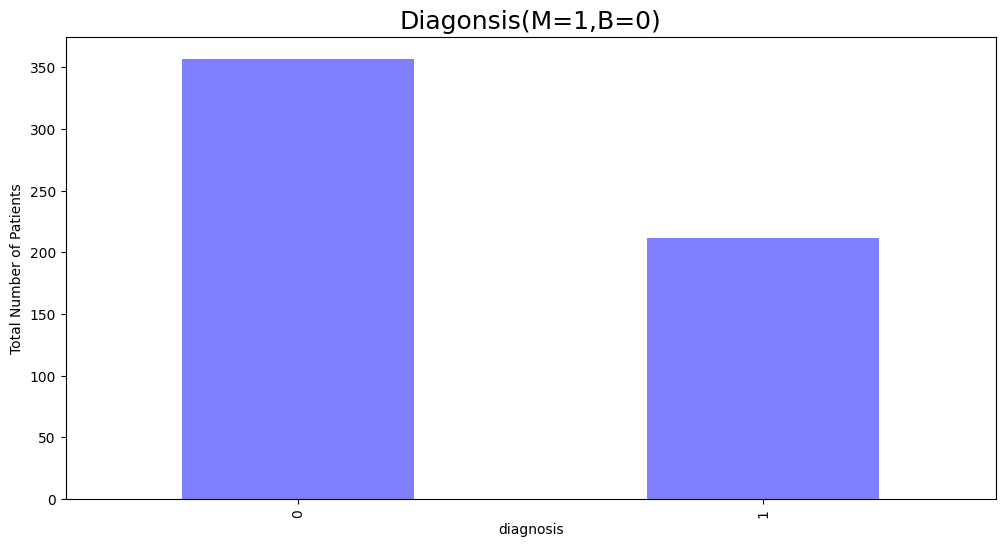

In [19]:
data['diagnosis'].value_counts().plot(kind='bar',facecolor='b',figsize=(12,6),alpha=0.5)
plt.title('Diagonsis(M=1,B=0)',fontsize=18)
plt.ylabel("Total Number of Patients")


In [20]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [21]:
#cosidering only mean features of nucleus 
data_mean = data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]


In [22]:
data_mean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


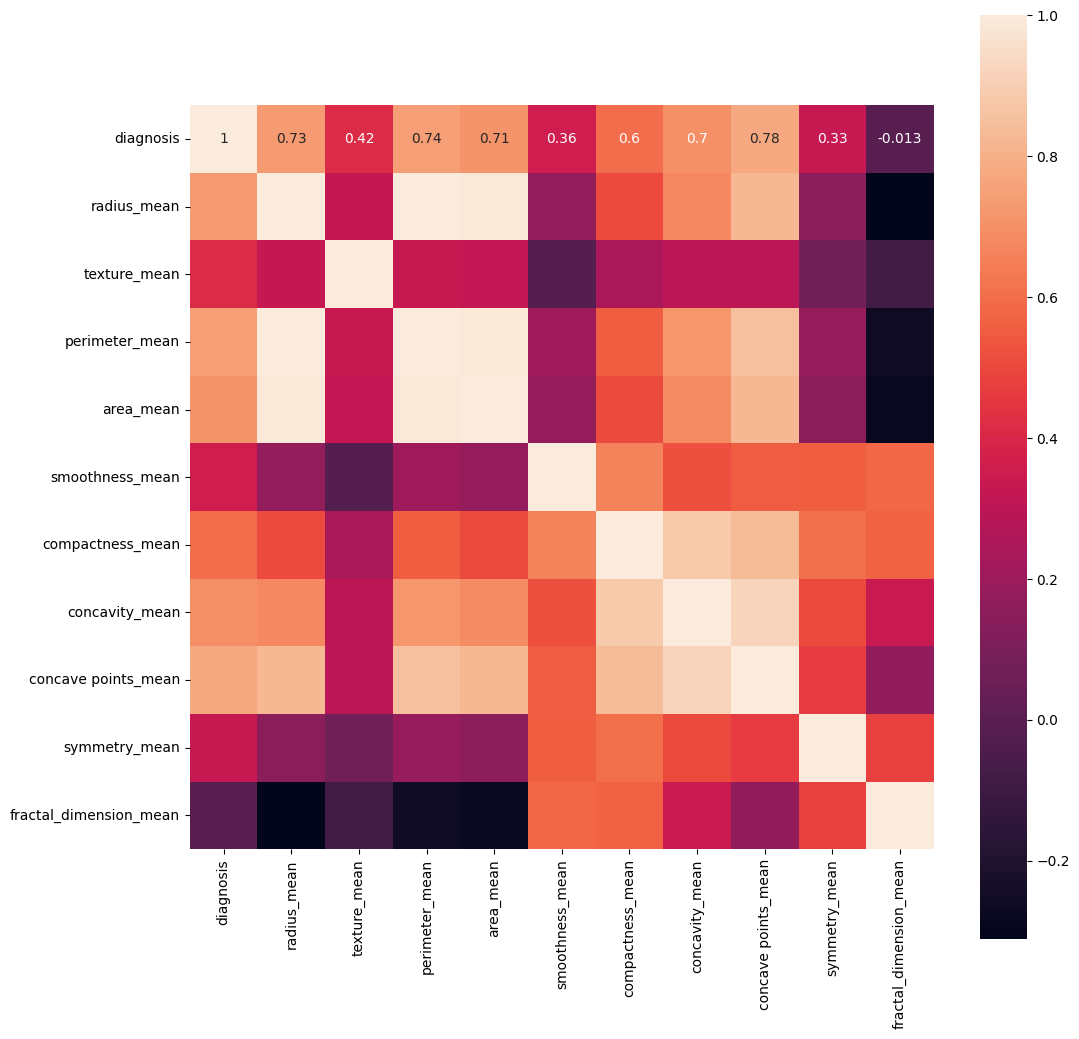

In [23]:
plt.figure(figsize=(12,12))
corr = sns.heatmap(data_mean.corr(),square=True,annot=True)


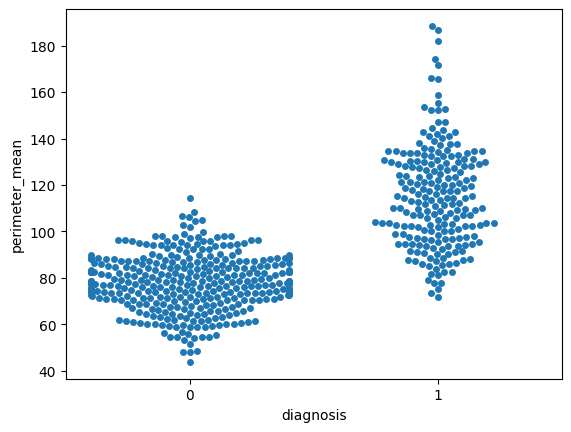

In [24]:
fig = sns.swarmplot(y='perimeter_mean',x='diagnosis',data=data_mean)

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict


In [26]:
X = data_mean.iloc[:,1:11].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

In [27]:
y = data_mean.iloc[:,0].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 10), (114, 10), (455,), (114,))

In [30]:
#Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
sc

StandardScaler()

In [33]:
X_train = sc.fit_transform(X_train)

In [34]:
X_test = sc.transform(X_test)

In [35]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.80249002,
         0.29453906,  0.0942515 ],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.89871612,
         0.75493453, -0.42547082],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.08844569,
        -0.27182044, -0.57522132],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.89819738,
        -1.10857092,  1.01624477],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.26287094,
        -0.57144288,  0.26455599],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.19815901,
        -1.53973493,  0.44513748]])

In [36]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  0.85669688,
         1.12032775,  1.5535848 ],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.72649475,
        -0.69567658, -1.00245069],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.57502294,
        -0.80529455, -0.99951441],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  2.00259148,
        -0.31201369, -0.31389202],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  1.18843052,
         0.18492109, -0.47832394],
       [ 0.26263752, -0.58080224,  0.28459338, ...,  0.33017673,
        -0.5166339 ,  0.88411198]])

In [37]:
#training on an algorithm (random forest)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
model = rf.fit(X_train,y_train)

In [40]:
print("The Accuracy of Random Forest is : ",rf.score(X_train,y_train))


The Accuracy of Random Forest is :  0.9956043956043956


In [41]:
pred = model.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


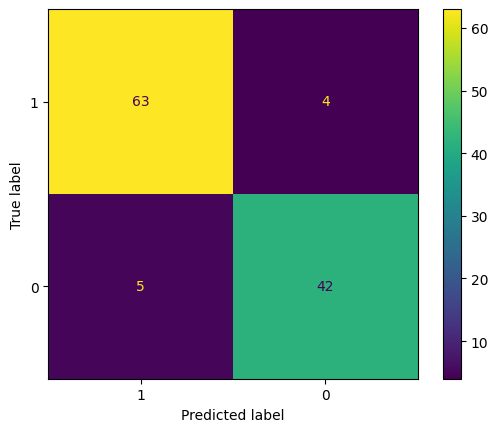

In [43]:
cm = confusion_matrix(y_true=y_test,y_pred=pred)
ConfusionMatrixDisplay(cm,display_labels=data['diagnosis'].unique()).plot()
plt.grid(False)

In [44]:
#xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

In [45]:
# Initialize XGBoost classifier
xgb = XGBClassifier()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [46]:
# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        67
           1       0.91      0.89      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [47]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred ) 
recall = recall_score(y_test, y_pred )  

print(f"Accuracy: {acc * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

Accuracy: 92.11%
Precision: 91.30%
Recall: 89.36%


In [48]:
#knn

In [49]:
import math


In [50]:
math.sqrt(data.shape[0])

23.853720883753127

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [53]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9385964912280702

In [54]:
# Train and test each classifier
classifiers = [knn, xgb, cm]
classifier_names = ['KNeighboursClassifier, XGBClassifier, RandomForestClassifier']
results = {}

In [55]:
for clf, clf_name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[clf_name] = accuracy

In [56]:
# Display results
for clf_name, accuracy in results.items():
    print(f"{clf_name}: Accuracy = {accuracy:.4f}")

KNeighboursClassifier, XGBClassifier, RandomForestClassifier: Accuracy = 0.9386


In [57]:
#for roc curve implemtation
from sklearn.metrics import roc_curve, auc

In [58]:
# for predictions 
y_scores = rf.predict_proba(X_test)[:, 1]

In [59]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

<function matplotlib.pyplot.show(close=None, block=None)>

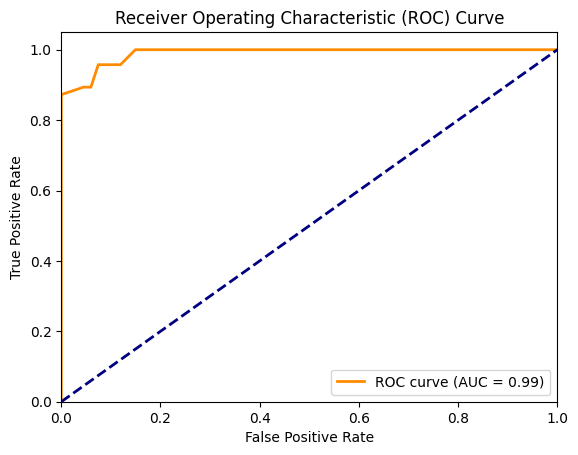

In [60]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show

In [61]:
# for predictionsof knn
y_scores = knn.predict_proba(X_test)[:, 1]

In [62]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

<function matplotlib.pyplot.show(close=None, block=None)>

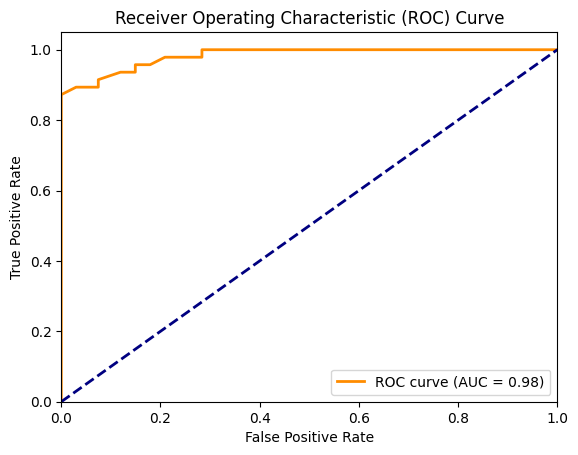

In [63]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show

In [64]:
#GUI
import tkinter as tk
from tkinter import ttk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
# Initialize classifiers
knn_classifier = KNeighborsClassifier()
xgb_classifier = XGBClassifier()
rf_classifier = RandomForestClassifier()

In [67]:
# Train classifiers
knn_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
# Function to make predictions
def predict():
    # Get user input
    features = [float(entry.get()) for entry in entries]
    
    # Prepare input data
    input_data = [features]
    
    # Make predictions
    input_data_scaled = scaler.transform(input_data)
    knn_prediction = knn_classifier.predict(input_data_scaled)[0]
    xgb_prediction = xgb_classifier.predict(input_data_scaled)[0]
    rf_prediction = rf_classifier.predict(input_data_scaled)[0]
    # Show results
    result_knn.set('Malignant' if knn_prediction == 1 else 'Benign')
    result_xgb.set('Malignant' if xgb_prediction == 1 else 'Benign')
    result_rf.set('Malignant' if rf_prediction == 1 else 'Benign')

In [69]:
# Create GUI window
window = tk.Tk()
window.title("Breast Cancer Detection")

''

In [70]:
# Labels and entry fields
labels = ['Mean Radius:', 'Mean Texture:', 'Mean Perimeter:', 'Mean Area:', 'Mean Smoothness:',
          'Mean Compactness:', 'Mean Concavity:', 'Mean Concave Points:', 'Mean Symmetry:', 'Mean Fractal Dimension:']
entries = []

for i in range(10):
    ttk.Label(window, text=labels[i]).grid(row=i, column=0, padx=5, pady=5)
    entry = ttk.Entry(window)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entries.append(entry)

In [71]:
# Predict button
button_predict = ttk.Button(window, text="Predict", command=predict)
button_predict.grid(row=10, column=0, columnspan=2, padx=5, pady=5)

In [72]:
# Results
result_knn = tk.StringVar()
result_xgb = tk.StringVar()
result_rf = tk.StringVar()

ttk.Label(window, text="KNN Prediction:").grid(row=11, column=0, padx=5, pady=5)
ttk.Label(window, textvariable=result_knn).grid(row=11, column=1, padx=5, pady=5)

ttk.Label(window, text="XGBoost Prediction:").grid(row=12, column=0, padx=5, pady=5)
ttk.Label(window, textvariable=result_xgb).grid(row=12, column=1, padx=5, pady=5)

ttk.Label(window, text="Random Forest Prediction:").grid(row=13, column=0, padx=5, pady=5)
ttk.Label(window, textvariable=result_rf).grid(row=13, column=1, padx=5, pady=5)

# Run GUI
window.mainloop()